Load Range -1600 to -1200
Optimal Parameters:
B: 0.18451859784612704
C: 1.7411442563343509
D: 3306.4939949983877
E: 0.29833384567167537
F: -0.05468781552109505
R² Accuracy: 0.995

Load Range -1200 to -800
Optimal Parameters:
B: 0.2765488583631022
C: 0.016701594221039284
D: 203033.8340262611
E: 1.2148116389748975
F: 0.00012094637600790258
R² Accuracy: 0.996

Load Range -800 to -400
Optimal Parameters:
B: 0.3058052326388662
C: 0.04596862124228752
D: 36867.01205329227
E: 1.1485323496260922
F: 0.00032325501996303393
R² Accuracy: 0.965

Load Range -400 to 0
Optimal Parameters:
B: 0.38463360800965024
C: 0.035517784914526715
D: 18742.639965211223
E: 1.0801726497618815
F: -4.3864624864807865e-05
R² Accuracy: 0.998



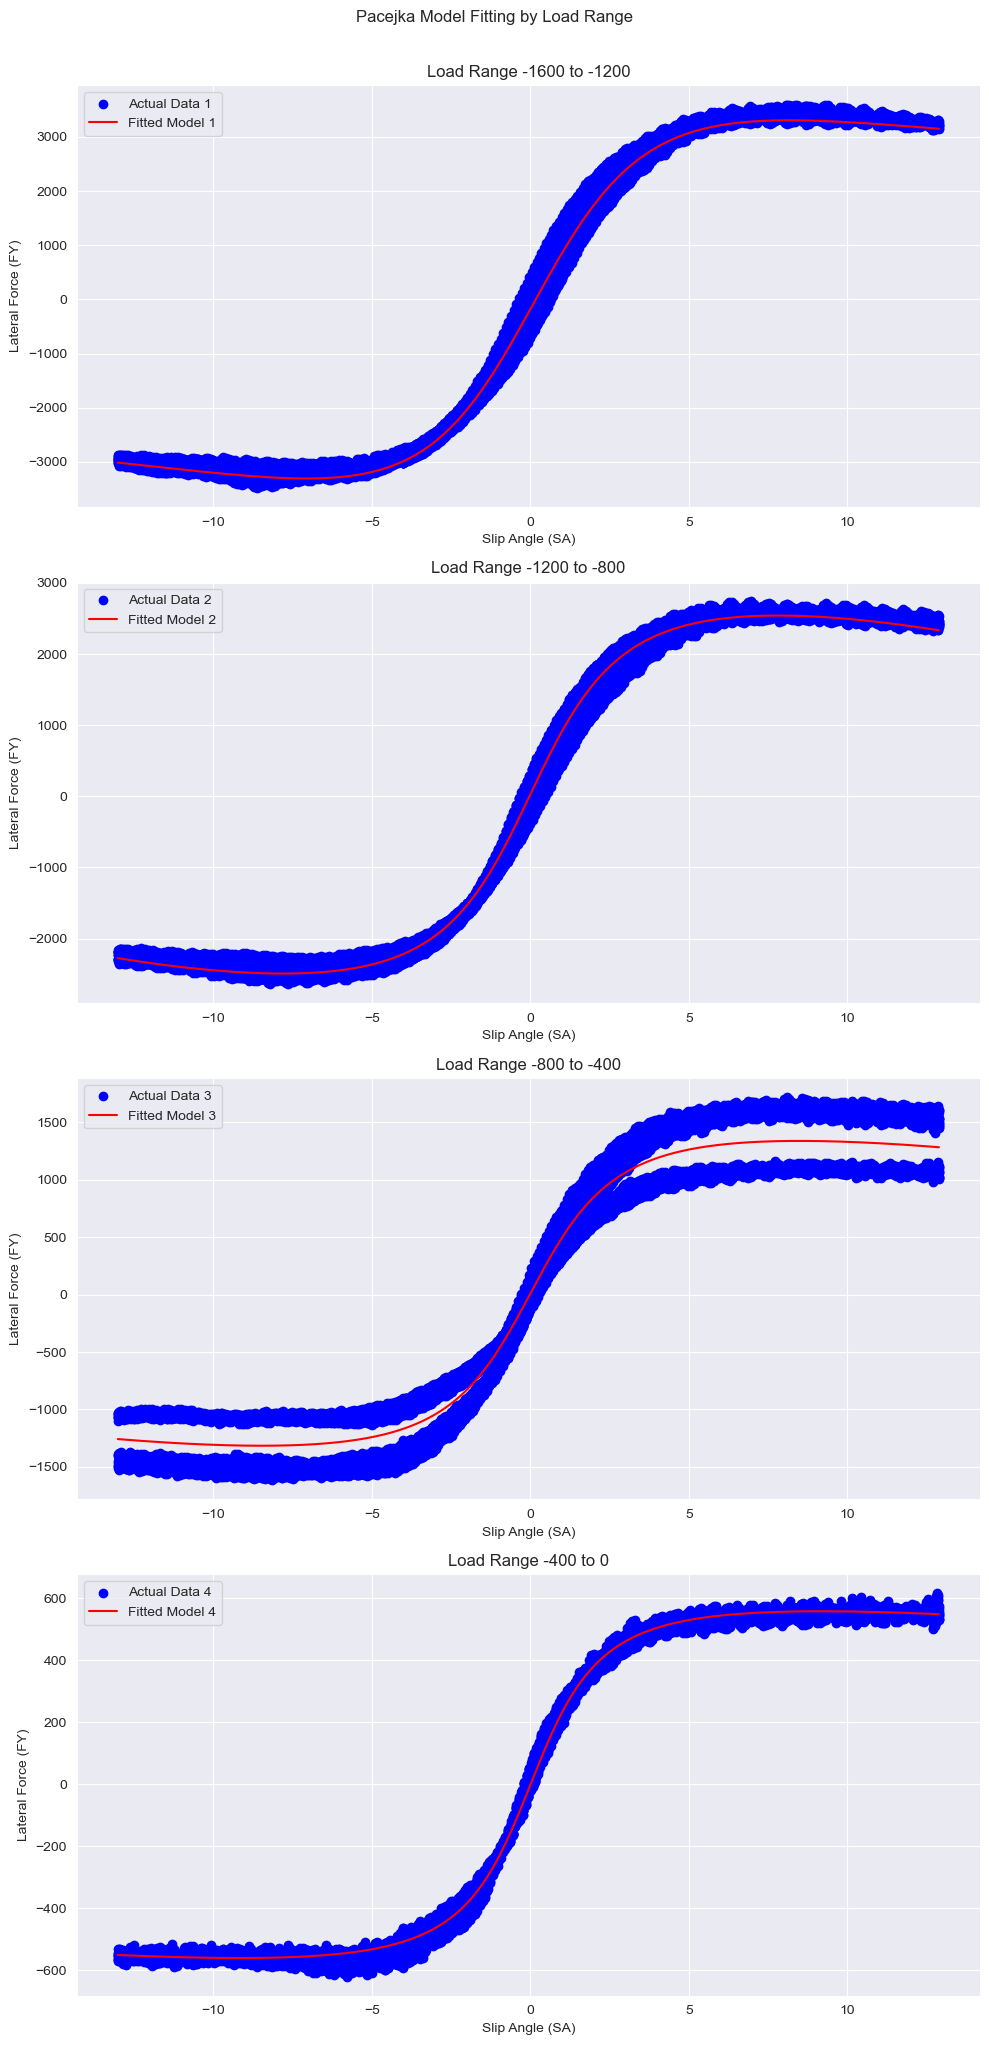

In [158]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Define the simplified Pacejka model function
def pacejka_model(alpha, B, C, D, E, F):
    return D * np.sin(C * np.arctan(B * alpha - E * (B * alpha - np.arctan(B * alpha))) + F)

# Define the path to the CSV file
data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tirecsvfiles/B1320run52.csv'

# Load the data, skipping the first row which contains units
data = pd.read_csv(data_path, skiprows=0)
data = data.drop(data.index[0])

# Convert relevant columns to numeric types, assuming 'deg' is slip angle, 'N.1' is lateral force, and 'N.2' is vertical load
data['SA'] = pd.to_numeric(data['SA'], errors='coerce')
data['FY'] = pd.to_numeric(data['FY'], errors='coerce')
data['FZ'] = pd.to_numeric(data['FZ'], errors='coerce')

# Flip the sign of FY to match the coordinate system
data['FY'] = data['FY'] * -1

# Define vertical load ranges for splitting the data
load_ranges = [(-1600, -1200), (-1200, -800), (-800, -400), (-400, 0)]

# Create a subplot figure with the number of load ranges
fig, axs = plt.subplots(len(load_ranges), 1, figsize=(10, len(load_ranges) * 5))

# Process each load range
for i, (lower_bound, upper_bound) in enumerate(load_ranges, start=1):
    # Filter the data based on the current load range
    load_data = data[(data['FZ'] >= lower_bound) & (data['FZ'] < upper_bound)]

    # Prepare the data for curve fitting
    x_data = load_data['SA']
    y_data = load_data['FY']

    # Apply curve fitting to find the optimal coefficients for each load range
    initial_guess = [0.5, 1.2, max(load_data['FY']), 1, 0]
    optimal_parameters, covariance = curve_fit(pacejka_model, x_data, y_data, p0=initial_guess, maxfev=15000)

    # Generate model predictions over the range of slip angles for visualization
    x_model = np.linspace(x_data.min(), x_data.max(), 500)
    y_model = pacejka_model(x_model, *optimal_parameters)

    # Calculate R^2 accuracy for each fitted curve
    y_pred = pacejka_model(x_data, *optimal_parameters)
    ss_res = np.sum((y_data - y_pred) ** 2)
    ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Use the appropriate subplot
    ax = axs[i - 1] if len(load_ranges) > 1 else axs

    # Add the scatter plot for actual data and the line plot for the fitted curve to the subplot
    ax.scatter(x_data, y_data, color='blue', label=f'Actual Data {i}')
    ax.plot(x_model, y_model, color= 'red', label=f'Fitted Model {i}')

    # Enhance the subplot
    ax.set_title(f'Load Range {lower_bound} to {upper_bound}')
    ax.set_xlabel('Slip Angle (SA)')
    ax.set_ylabel('Lateral Force (FY)')
    ax.legend()

    # Print the optimal parameters and R^2 value for the current load range
    print(f"Load Range {lower_bound} to {upper_bound}")
    print(f"Optimal Parameters:\nB: {optimal_parameters[0]}\nC: {optimal_parameters[1]}\nD: {optimal_parameters[2]}\nE: {optimal_parameters[3]}\nF: {optimal_parameters[4]}")
    print(f"R² Accuracy: {r_squared:.3f}\n")

# Enhancing the overall plot
plt.tight_layout()
plt.suptitle("Pacejka Model Fitting by Load Range", y=1.02)

# Display the plot
plt.show()


In [88]:
df = pd.read_csv(data_path, skiprows=0)
df = df.drop(df.index[0])

df.columns

Index(['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX',
       'MZ', 'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AMBTMP', 'SR'],
      dtype='object')

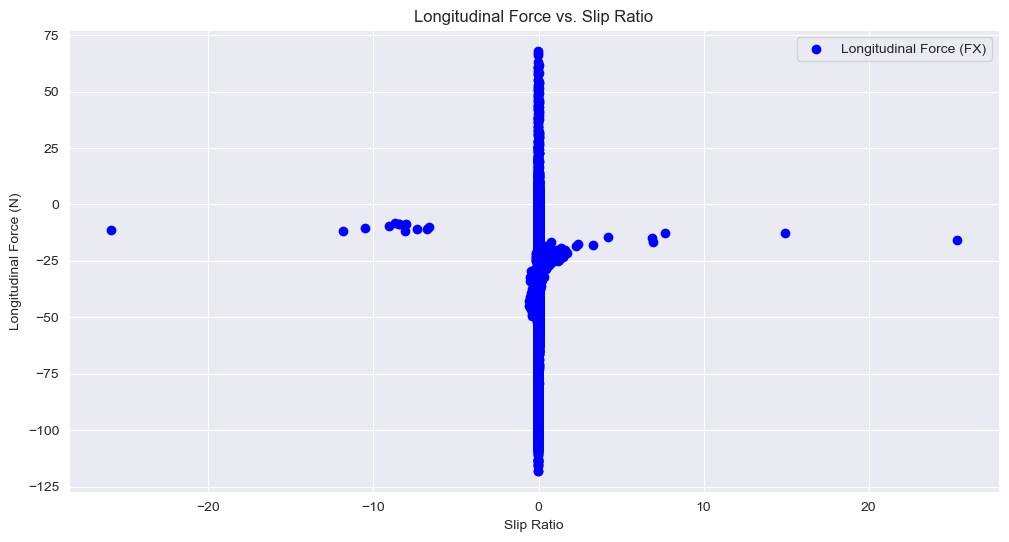

In [46]:
data['SR'] = pd.to_numeric(data['SR'], errors='coerce')
data['FX'] = pd.to_numeric(data['FX'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.scatter(data['SR'], data['FX'], color='blue', label='Longitudinal Force (FX)')
plt.title('Longitudinal Force vs. Slip Ratio')
plt.xlabel('Slip Ratio')
plt.ylabel('Longitudinal Force (N)')
plt.legend()
plt.grid(True)
plt.show()

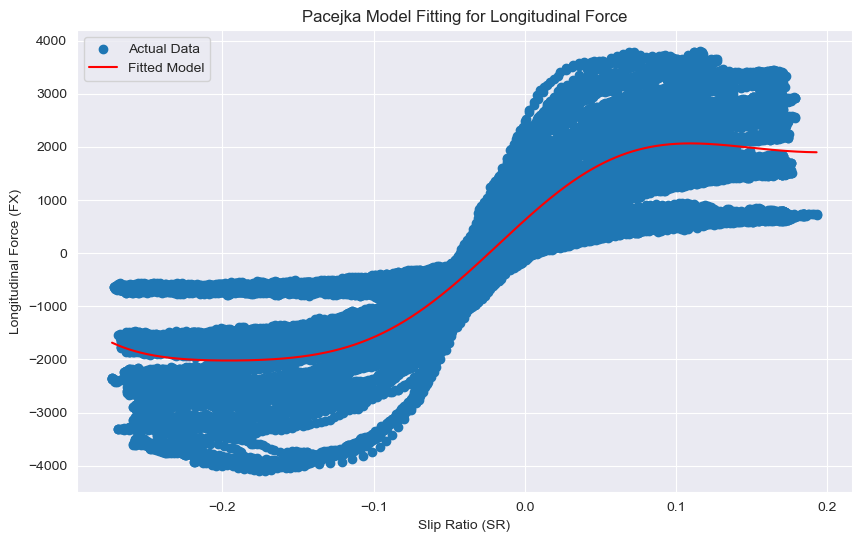

Optimal Parameters: [1.10656162e+00 1.17549529e+01 2.06416479e+03 2.23096387e+01
 3.05167328e-01]


In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Define the simplified Pacejka model function for longitudinal forces
def pacejka_longitudinal_model(sr, B, C, D, E, F):
    return D * np.sin(C * np.arctan(B * sr - E * (B * sr - np.arctan(B * sr))) + F)

# Load the data
data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tirecsvfiles/B1320run125.csv'
data = pd.read_csv(data_path)

# Assuming 'SR' is slip ratio and 'FX' is longitudinal force
# Convert relevant columns to numeric types
data['SR'] = pd.to_numeric(data['SR'], errors='coerce')
data['FX'] = pd.to_numeric(data['FX'], errors='coerce')

# Sort the data by slip ratio to ensure a continuous curve
data.sort_values(by='SR', inplace=True)

# Filter out any rows with NaN values after conversion
data.dropna(subset=['SR', 'FX'], inplace=True)

# Define bounds for the parameters (B, C, D, E, F)
# These should be chosen based on the expected physical range of each parameter
parameter_bounds = ([0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])

# Prepare the data for curve fitting
x_data = data['SR']
y_data = data['FX']

# Apply curve fitting to find the optimal coefficients
initial_guess = [1, 1, max(y_data), 1, 0]
optimal_parameters, covariance = curve_fit(pacejka_longitudinal_model, x_data, y_data, p0=initial_guess, bounds=parameter_bounds, maxfev=10000)

# Generate model predictions over the range of slip ratios for visualization
x_model = np.linspace(x_data.min(), x_data.max(), 500)
y_model = pacejka_longitudinal_model(x_model, *optimal_parameters)

# Plot the actual data and the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Actual Data')
plt.plot(x_model, y_model, label='Fitted Model', color='red')
plt.title('Pacejka Model Fitting for Longitudinal Force')
plt.xlabel('Slip Ratio (SR)')
plt.ylabel('Longitudinal Force (FX)')
plt.legend()
plt.show()

# Print the optimal parameters
print(f"Optimal Parameters: {optimal_parameters}")


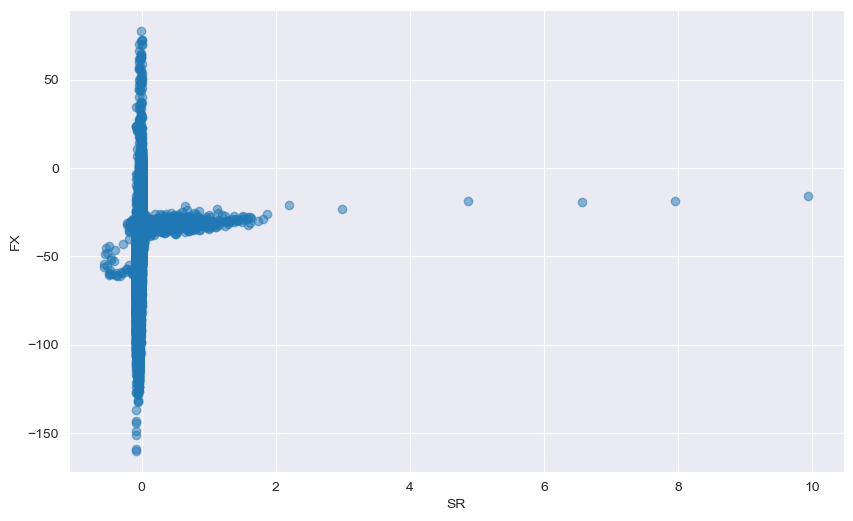

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
import numpy as np



# Load the CSV file, skipping the first row to exclude units
data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tirecsvfiles/B1320run53.csv'
data = pd.read_csv(data_path, skiprows=1)

# Directly cast the columns to float, without using coercion
try:
    data['SR'] = data['none.2'].astype(float)
    data['FX'] = data['N'].astype(float)
    data['IA'] = data['deg'].astype(float)
    data['FZ'] = data['N.2'].astype(float)
except ValueError as e:
    # If there is a ValueError, print it out
    print(e)

# Drop rows with NaN values after conversion
data = data.dropna(subset=['SR', 'FX', 'IA', 'FZ'])

# Function to convert to float or return NaN
def to_float(s):
    try:
        return float(s)
    except ValueError:
        return pd.NA

x_metric = 'SR'
y_metric = 'FX'

# Apply conversion function to 'SR' and 'FX', drop rows with NA values after conversion
data[x_metric] = data[x_metric].apply(to_float)
data[y_metric] = data[y_metric].apply(to_float)
data.dropna(subset=[x_metric, y_metric], inplace=True)

# Plot SR vs FX
plt.figure(figsize=(10, 6))
plt.scatter(data[x_metric], data[y_metric], alpha=0.5)
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.grid(True)
plt.show()


   SR_assumed  FX_assumed
0       0.031      -22.97
1       0.420      -22.22
2       0.621      -23.24
3       0.860      -23.21
4       0.576      -24.00


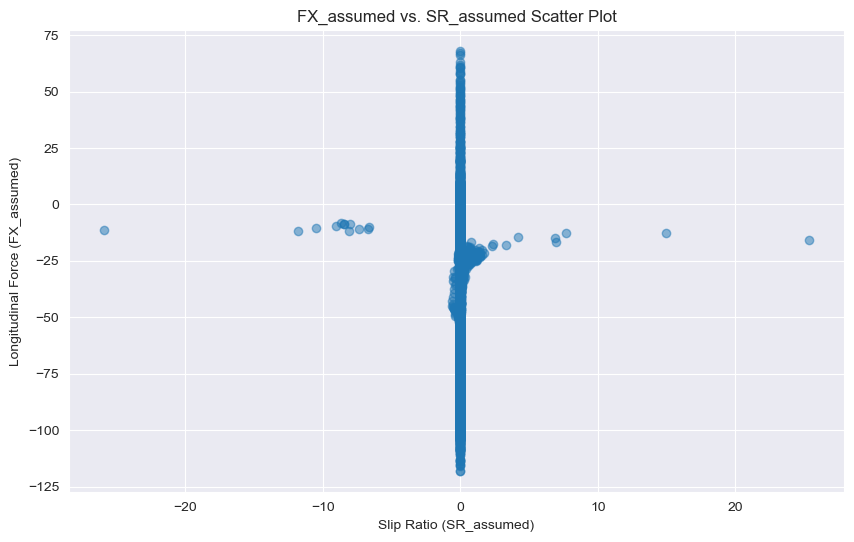

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file, skipping the first row to exclude units
data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tirecsvfiles/B1320run52.csv'
data = pd.read_csv(data_path, skiprows=1)

# Assuming 'none.2' represents Slip Ratio (SR) and 'N' represents Longitudinal Force (FX)
# Convert these columns to float, setting errors='coerce' to replace non-numeric values with NaN
data['SR_assumed'] = pd.to_numeric(data['none.2'], errors='coerce')
data['FX_assumed'] = pd.to_numeric(data['N'], errors='coerce')

# Drop rows with NaN values in 'SR_assumed' and 'FX_assumed' columns, which might have resulted from non-numeric entries
data_cleaned = data.dropna(subset=['SR_assumed', 'FX_assumed'])

# Display the first few rows of the cleaned dataframe to confirm the changes
print(data_cleaned[['SR_assumed', 'FX_assumed']].head())

# Plot SR_assumed vs FX_assumed
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['SR_assumed'], data_cleaned['FX_assumed'], alpha=0.5)
plt.title('FX_assumed vs. SR_assumed Scatter Plot')
plt.xlabel('Slip Ratio (SR_assumed)')
plt.ylabel('Longitudinal Force (FX_assumed)')
plt.grid(True)
plt.show()


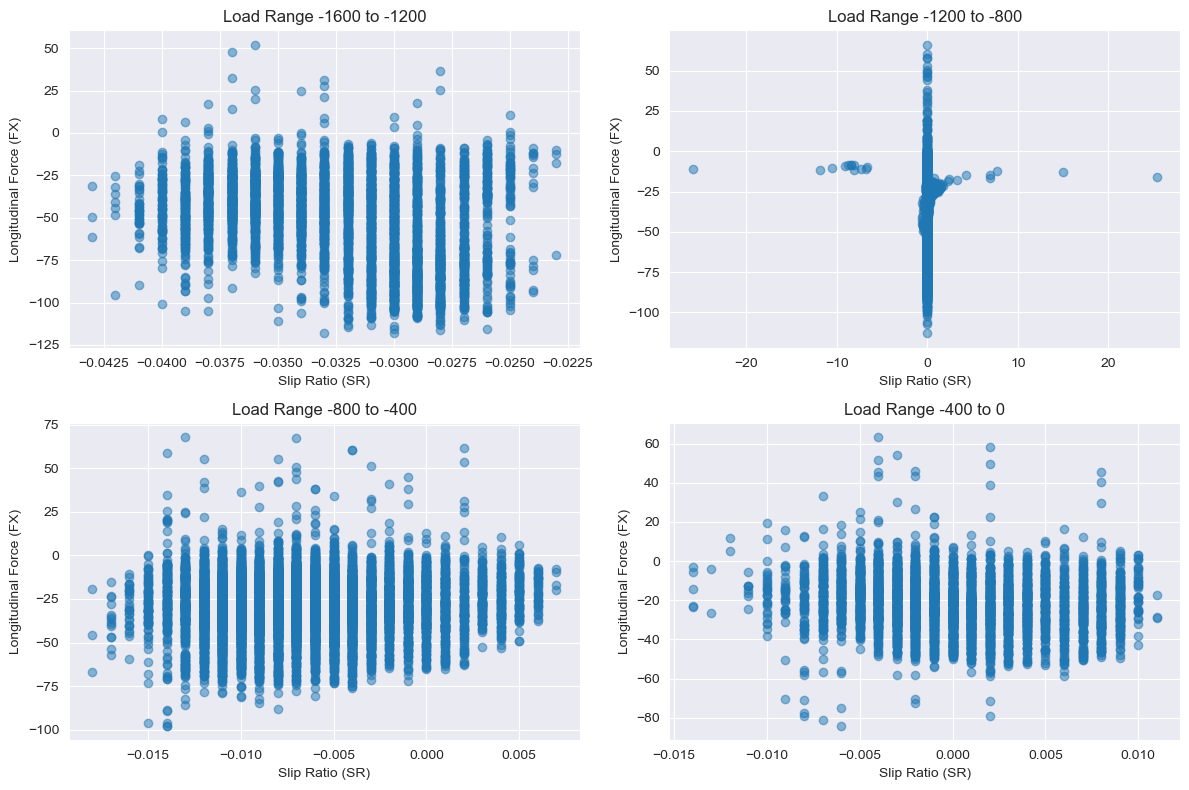

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file, skipping the first row to exclude units
data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tirecsvfiles/B1320run52.csv'
data = pd.read_csv(data_path, skiprows=1)

# Convert 'SR' (assumed to be 'none.2') and 'FX' ('N') to numeric types, setting errors='coerce'
data['SR'] = pd.to_numeric(data['none.2'], errors='coerce')
data['FX'] = pd.to_numeric(data['N'], errors='coerce')
data['FZ'] = pd.to_numeric(data['N.2'], errors='coerce')

# Drop rows with NaN values in 'SR', 'FX', and 'FZ' columns, which might have resulted from non-numeric entries
data_cleaned = data.dropna(subset=['SR', 'FX', 'FZ'])

# Define load segments for analysis based on FZ (vertical load) range
load_segments = [(-1600, -1200), (-1200, -800), (-800, -400), (-400, 0)]


# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Loop through each load segment and plot SR vs FX
for i, (lower_bound, upper_bound) in enumerate(load_segments, start=1):
    # Filter data for the current load segment
    segment_data = data_cleaned[(data_cleaned['FZ'] >= lower_bound) & (data_cleaned['FZ'] < upper_bound)]

    # Plot SR vs FX for the segment
    plt.subplot(2, 2, i)
    plt.scatter(segment_data['SR'], segment_data['FX'], alpha=0.5)
    plt.title(f'Load Range {lower_bound} to {upper_bound}')
    plt.xlabel('Slip Ratio (SR)')
    plt.ylabel('Longitudinal Force (FX)')
    plt.grid(True)

plt.tight_layout()
plt.show()


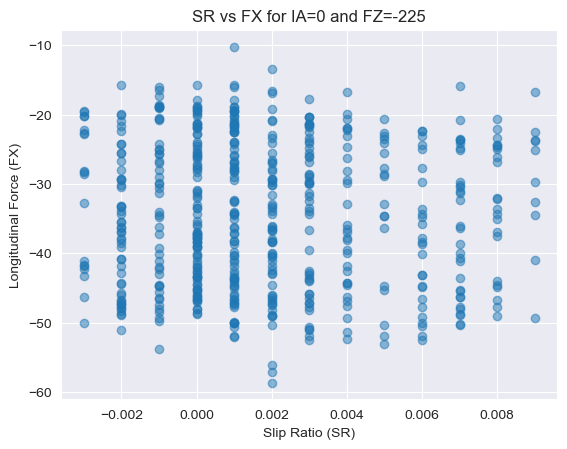

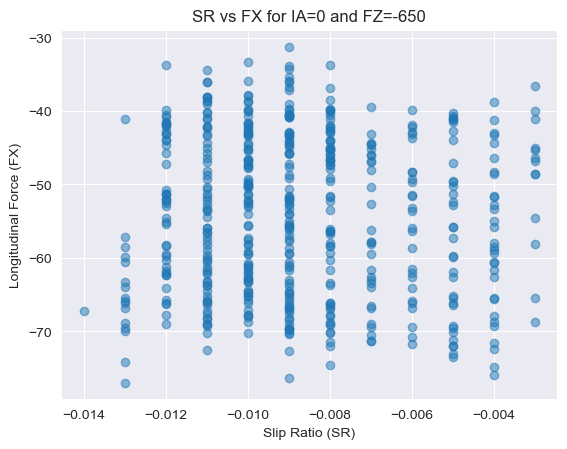

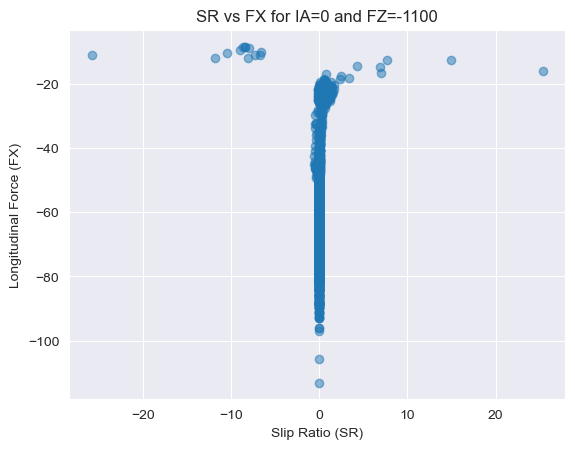

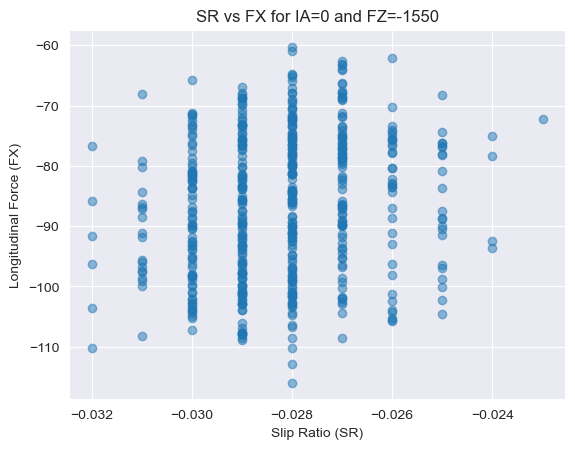

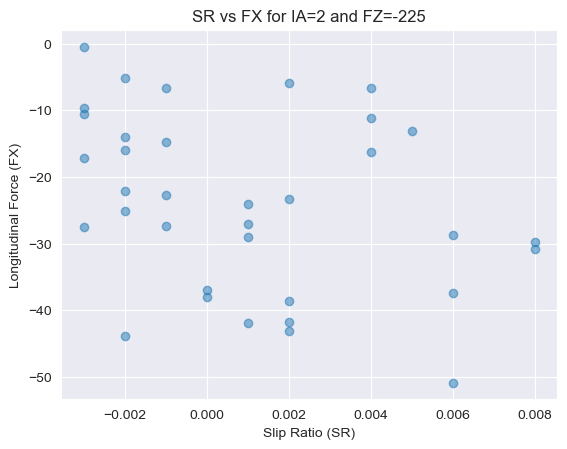

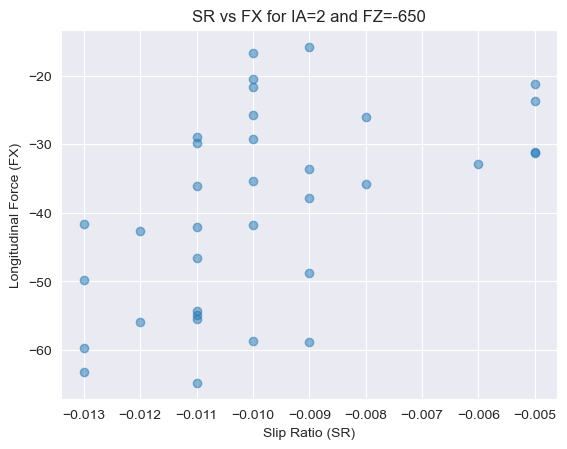

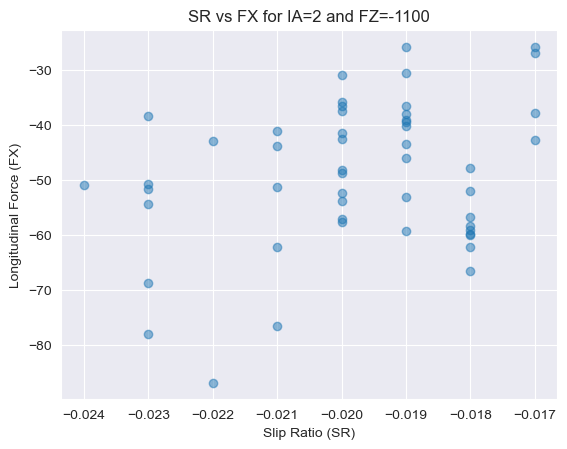

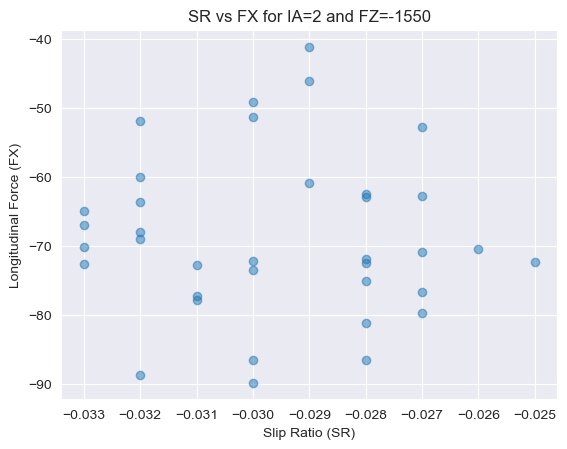

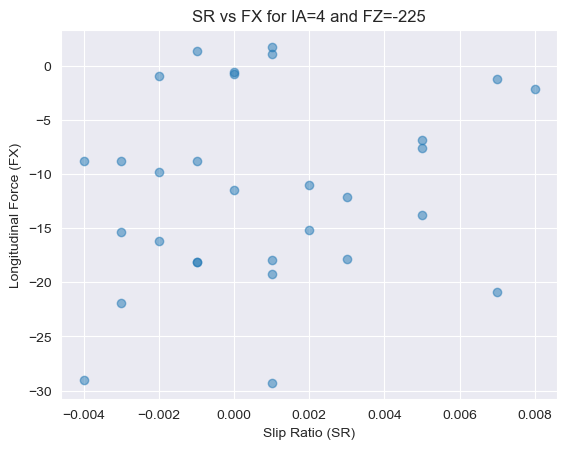

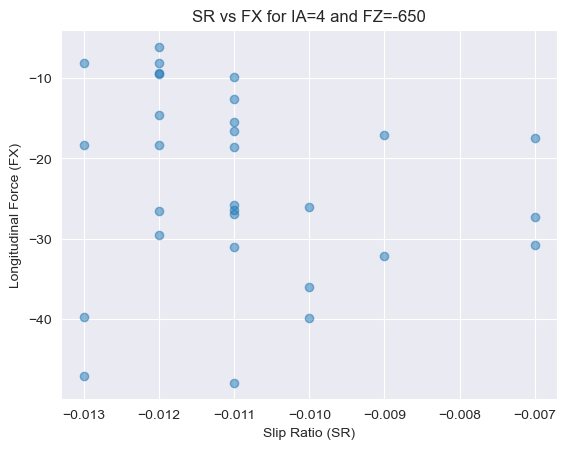

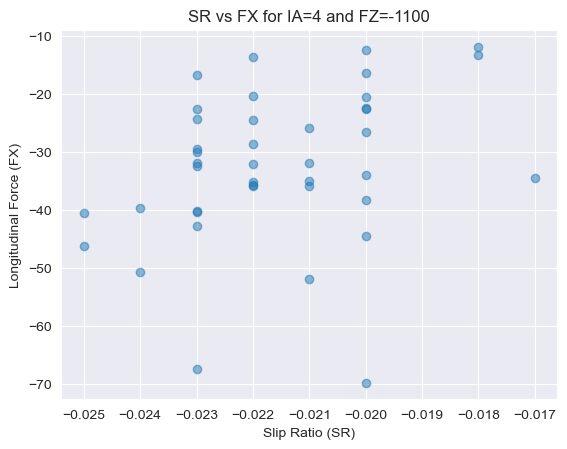

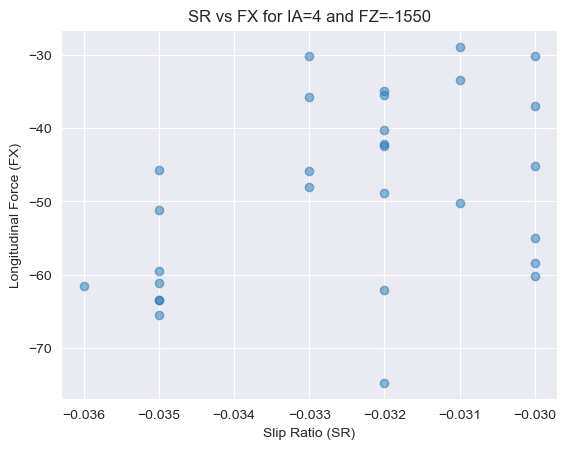

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the CSV file, skipping the first row to exclude units
data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tirecsvfiles/B1320run52.csv'
data = pd.read_csv(data_path, skiprows=1)

# Directly cast the columns to float, without using coercion
try:
    data['SR'] = data['none.2'].astype(float)
    data['FX'] = data['N'].astype(float)
    data['IA'] = data['deg'].astype(float)
    data['FZ'] = data['N.2'].astype(float)
except ValueError as e:
    # If there is a ValueError, print it out
    print(e)

# Drop rows with NaN values after conversion
data_cleaned = data.dropna(subset=['SR', 'FX', 'IA', 'FZ'])

# Define inclination angles (IAs) and vertical loads (FZs)
IAs = [0, 2, 4]
FZs = [-225, -650, -1100, -1550]

# Initialize the index matrix for all combinations of IAs and FZs
IAFZ = np.zeros((len(data_cleaned), len(IAs) * len(FZs)), dtype=bool)

# Populate the index matrix with the correct binning logic
col = 0
for ia in IAs:
    for fz in FZs:
        IA_condition = (data_cleaned['IA'] > (ia - 0.1)) & (data_cleaned['IA'] < (ia + 0.1))
        FZ_condition = (data_cleaned['FZ'] > (fz - 100)) & (data_cleaned['FZ'] < (fz + 100))
        IAFZ[:, col] = IA_condition & FZ_condition
        col += 1

# Plotting the data for each IA and FZ bin
for col in range(IAFZ.shape[1]):
    plt.figure()
    subset = data_cleaned[IAFZ[:, col]]
    plt.scatter(subset['SR'], subset['FX'], alpha=0.5)
    plt.xlabel('Slip Ratio (SR)')
    plt.ylabel('Longitudinal Force (FX)')
    ia_index = col // len(FZs)
    fz_index = col % len(FZs)
    plt.title(f'SR vs FX for IA={IAs[ia_index]} and FZ={FZs[fz_index]}')
    plt.grid(True)
    plt.show()


In [94]:
import pandas as pd

# Load the CSV file, specifying the decimal separator if necessary
# If the file uses a comma as the decimal separator, uncomment the next line
# data = pd.read_csv(data_path, skiprows=1, decimal=',')
data = pd.read_csv(data_path, skiprows=1)

# Check for non-numeric values before coercion
for column in ['none.2', 'N', 'deg', 'N.2']:
    non_numeric_values = data[column].apply(lambda x: not str(x).replace('.', '').isdigit())
    if non_numeric_values.any():
        print(f"Non-numeric values found in {column}:")
        print(data[non_numeric_values][column])

# Now that we've checked for non-numeric values, convert columns to numeric
data['SR'] = pd.to_numeric(data['none.2'], errors='coerce')
data['FX'] = pd.to_numeric(data['N'], errors='coerce')
data['IA'] = pd.to_numeric(data['deg'], errors='coerce')
data['FZ'] = pd.to_numeric(data['N.2'], errors='coerce')

# Drop rows with NaN values
data_cleaned = data.dropna(subset=['SR', 'FX', 'IA', 'FZ'])


Non-numeric values found in none.2:
13      -0.013
16      -0.021
17      -0.016
18      -0.011
20      -0.087
         ...  
26126   -9.067
26127   -6.624
26128   -7.353
26129   -8.055
26130   -6.739
Name: none.2, Length: 22311, dtype: float64
Non-numeric values found in N:
0       -22.97
1       -22.22
2       -23.24
3       -23.21
4       -24.00
         ...  
26126    -9.36
26127    -9.90
26128   -10.91
26129    -8.80
26130   -10.87
Name: N, Length: 25600, dtype: float64
Non-numeric values found in deg:
0       -0.012
1       -0.015
2       -0.008
3       -0.014
4       -0.012
         ...  
26126   -0.021
26127   -0.028
26128   -0.027
26129   -0.024
26130   -0.019
Name: deg, Length: 16308, dtype: float64
Non-numeric values found in N.2:
0       -1075.57
1       -1075.44
2       -1071.98
3       -1073.30
4       -1074.02
          ...   
26126   -1101.14
26127   -1100.30
26128   -1102.34
26129   -1101.71
26130   -1100.88
Name: N.2, Length: 26131, dtype: float64


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
def import_data(data_path):
    data = pd.read_csv(data_path, sep='\t',skiprows=1)
    data = data.drop(0)
    return data

data = import_data(data_path = 'tiredatfiles/B1320run52.dat')

data_cleaned = data.dropna(subset=['SR', 'FX', 'IA', 'FZ'])

data_cleaned['SR'] = data_cleaned['SR'].astype(float)
data_cleaned['FX'] = data_cleaned['FX'].astype(float)
data_cleaned['IA'] = data_cleaned['IA'].astype(float)
data_cleaned['FZ'] = data_cleaned['FZ'].astype(float)



# Drop rows with NaN values that resulted from coercion





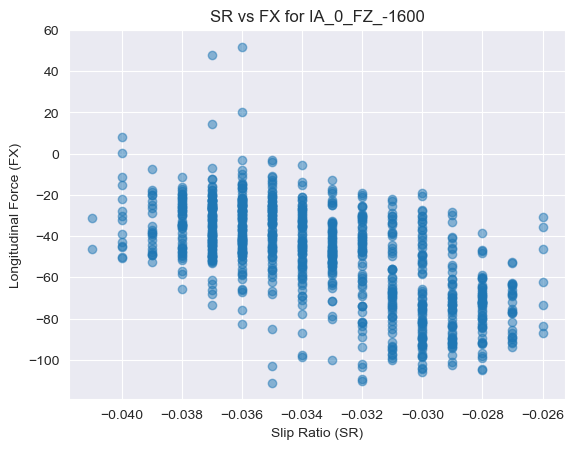

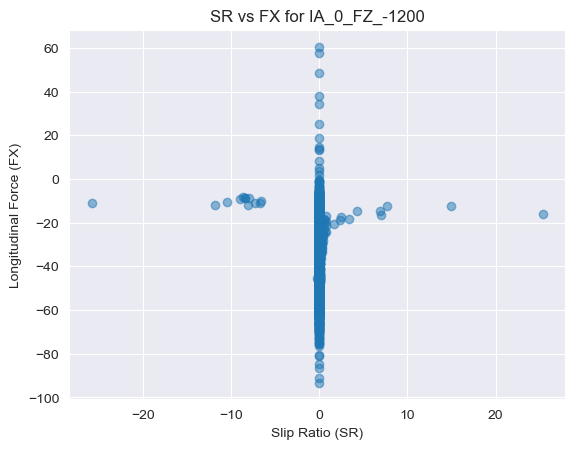

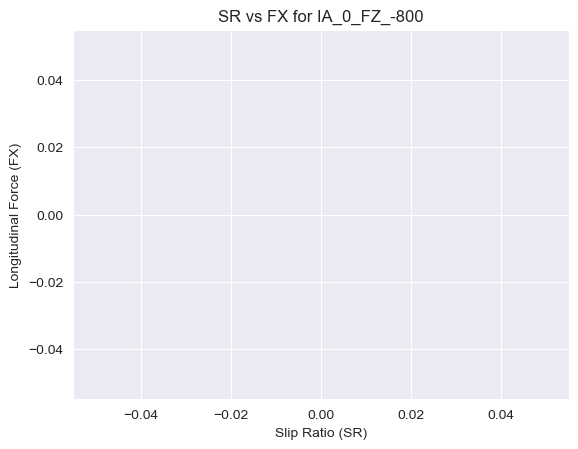

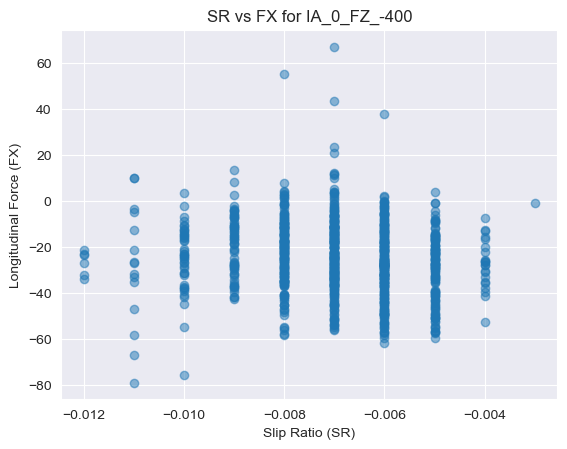

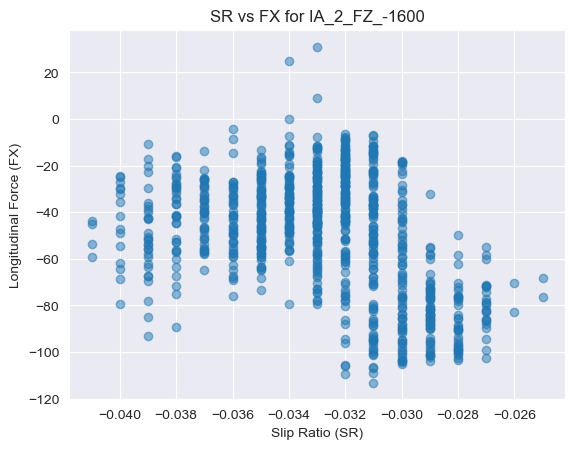

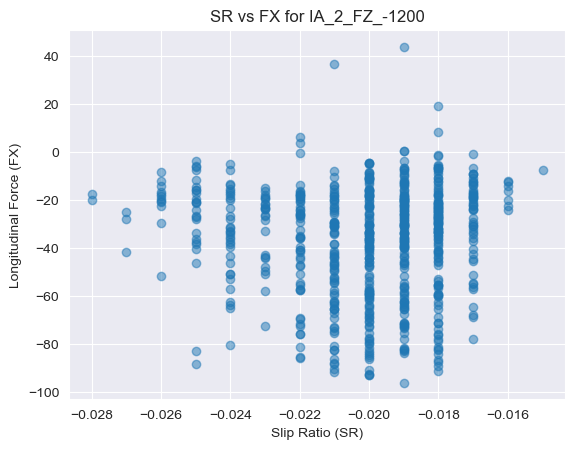

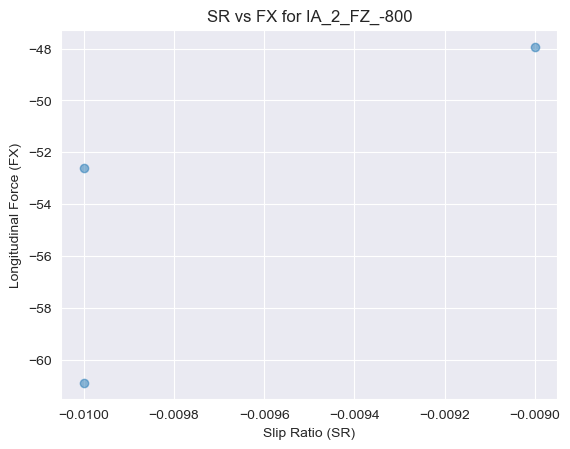

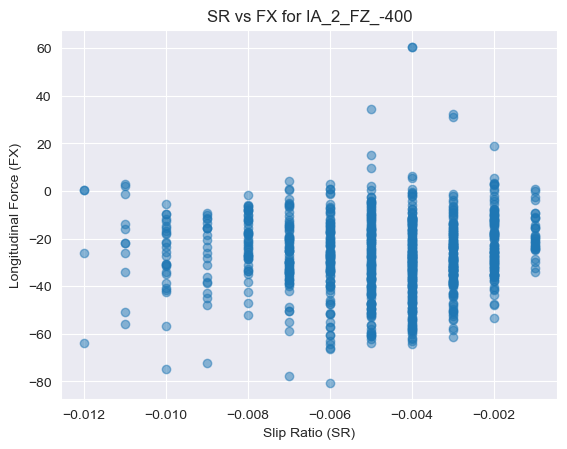

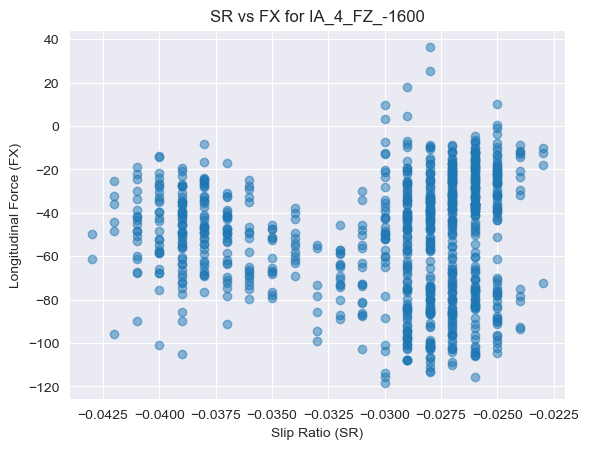

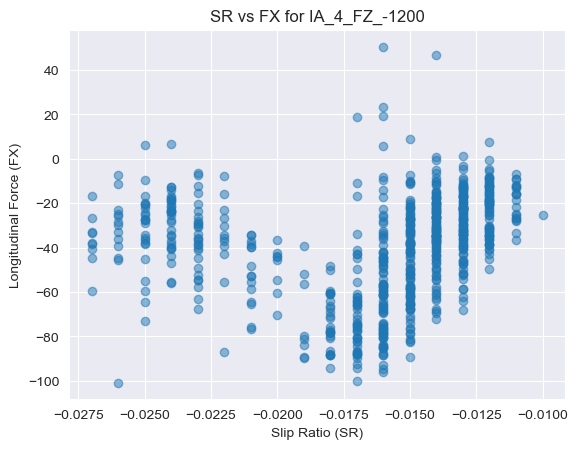

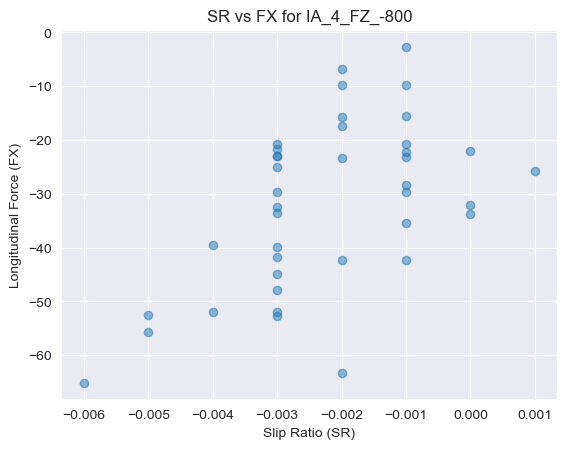

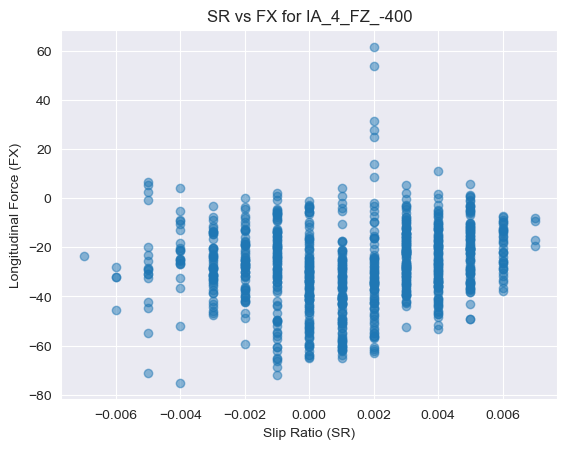

In [153]:


# Define the bin centers for IA and FZ
IAs = [0, 2, 4]
FZs = [-1600, -1200, -800, -400]

# Define the bin ranges for IA and FZ
IA_bin_width = 0.1
FZ_bin_width = 100

# Create a new DataFrame to hold the binned data
binned_data = pd.DataFrame()

# Bin the data for each IA and FZ combination
for IA_center in IAs:
    for FZ_center in FZs:
        # Create masks for IA and FZ bins
        IA_mask = (data_cleaned['IA'] >= IA_center - IA_bin_width) & (data_cleaned['IA'] <= IA_center + IA_bin_width)
        FZ_mask = (data_cleaned['FZ'] >= FZ_center - FZ_bin_width) & (data_cleaned['FZ'] <= FZ_center + FZ_bin_width)
        # Combine IA and FZ masks to create a mask for the current bin
        bin_mask = IA_mask & FZ_mask
        # Add a column to binned_data indicating whether each row belongs to the current bin
        bin_name = f'IA_{IA_center}_FZ_{FZ_center}'
        binned_data[bin_name] = bin_mask

# Now, binned_data contains a boolean column for each IA and FZ bin
# indicating whether each row of data_cleaned belongs to that bin

# Plotting the data for each bin
for bin_name in binned_data.columns:
    # Filter the original data for the current bin
    bin_mask = binned_data[bin_name]
    bin_subset = data_cleaned[bin_mask]
    # Plot SR vs. FX for the current bin
    plt.figure()
    plt.scatter(bin_subset['SR'], bin_subset['FX'], alpha=0.5)
    plt.title(f'SR vs FX for {bin_name}')
    plt.xlabel('Slip Ratio (SR)')
    plt.ylabel('Longitudinal Force (FX)')
    plt.grid(True)
    plt.show()


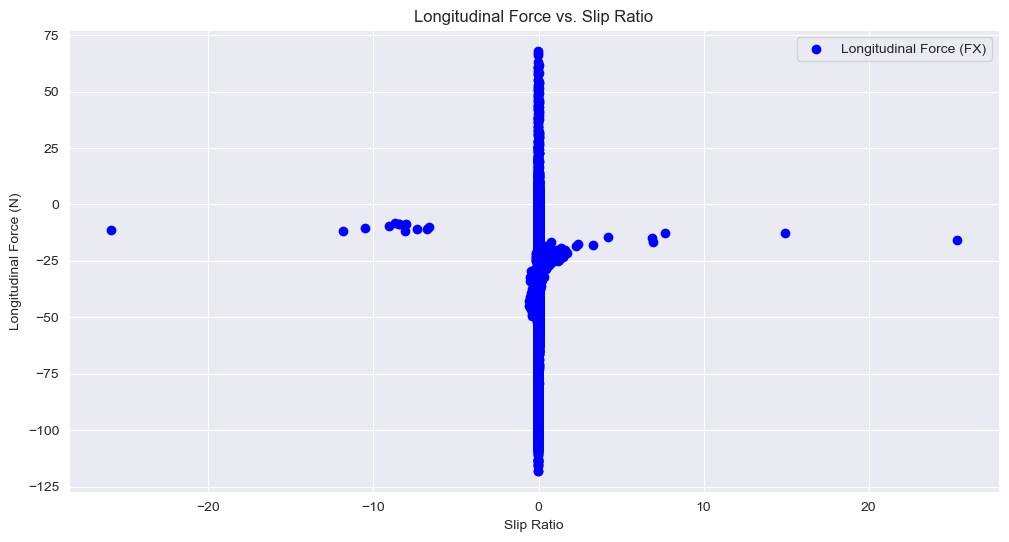

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the CSV file
def import_data(data_path):
    data = pd.read_csv(data_path, sep='\t', skiprows=1)
    data = data.drop(0)
    return data


data = import_data(data_path='tiredatfiles/B1320run52.dat')

data_cleaned = data.dropna(subset=['SR', 'FX', 'IA', 'FZ'])

data_cleaned['SR'] = data_cleaned['SR'].astype(float)
data_cleaned['FX'] = data_cleaned['FX'].astype(float)
data_cleaned['IA'] = data_cleaned['IA'].astype(float)
data_cleaned['FZ'] = data_cleaned['FZ'].astype(float)



plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['SR'], data_cleaned['FX'], color='blue', label='Longitudinal Force (FX)')
plt.title('Longitudinal Force vs. Slip Ratio')
plt.xlabel('Slip Ratio')
plt.ylabel('Longitudinal Force (N)')
plt.legend()
plt.grid(True)
plt.show()

Load Range -1600 to -1200
Optimal Parameters:
B: -3.3944777445169607
C: -4.0482107323090055
D: -3397.963635498736
E: 2.8509584739889484
F: 0.4371703681171463
R² Accuracy: 0.971

Load Range -1200 to -800
Optimal Parameters:
B: -5.41930633998374
C: 2.7916685335907845
D: 2504.530319927711
E: 1.652062383510584
F: -0.3294239134224404
R² Accuracy: 0.976

Load Range -800 to -400
Optimal Parameters:
B: -10.491747022732927
C: 1.576755444051193
D: 1669.0617986358925
E: 0.4333792490051883
F: -0.18416376459516212
R² Accuracy: 0.973

Load Range -400 to 0
Optimal Parameters:
B: -16.2993273900387
C: 0.0857579714699996
D: 9263.19176644278
E: 1.0597803718650993
F: -0.0026890976539958324
R² Accuracy: 0.970



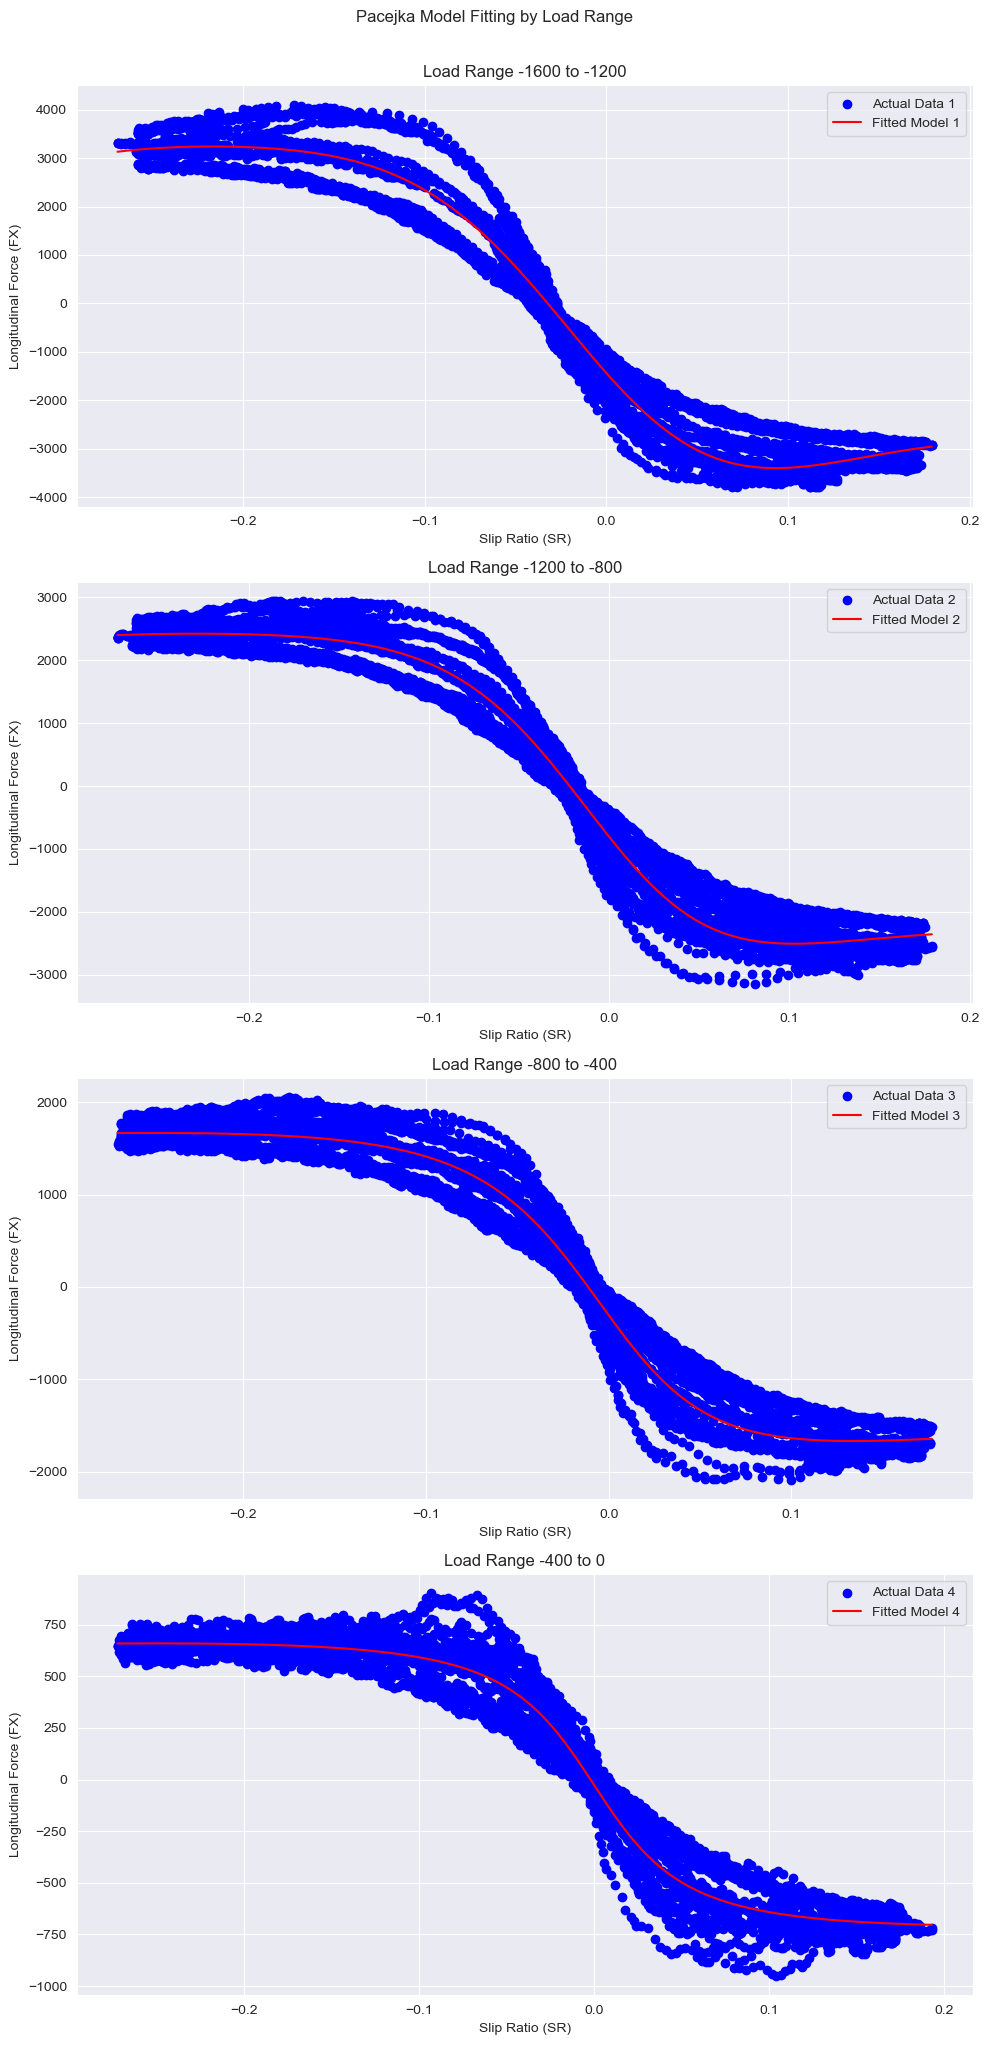

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Define the simplified Pacejka model function
def pacejka_model(alpha, B, C, D, E, F):
    return D * np.sin(C * np.arctan(B * alpha - E * (B * alpha - np.arctan(B * alpha))) + F)

# Define the path to the CSV file
data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tirecsvfiles/B1320run125.csv'

# Load the data, skipping the first row which contains units
data = pd.read_csv(data_path, skiprows=0)
data = data.drop(data.index[0])

# Convert relevant columns to numeric types, assuming 'deg' is slip angle, 'N.1' is lateral force, and 'N.2' is vertical load
data['SR'] = pd.to_numeric(data['SR'], errors='coerce')
data['FX'] = pd.to_numeric(data['FX'], errors='coerce')
data['FZ'] = pd.to_numeric(data['FZ'], errors='coerce')

# Flip the sign of FY to match the coordinate system
data['FX'] = data['FX'] * -1

# Define vertical load ranges for splitting the data
load_ranges = [(-1600, -1200), (-1200, -800), (-800, -400), (-400, 0)]

# Create a subplot figure with the number of load ranges
fig, axs = plt.subplots(len(load_ranges), 1, figsize=(10, len(load_ranges) * 5))

# Process each load range
for i, (lower_bound, upper_bound) in enumerate(load_ranges, start=1):
    # Filter the data based on the current load range
    load_data = data[(data['FZ'] >= lower_bound) & (data['FZ'] < upper_bound)]

    # Prepare the data for curve fitting
    x_data = load_data['SR']
    y_data = load_data['FX']

    # Apply curve fitting to find the optimal coefficients for each load range
    initial_guess = [0.75, 1.2, max(load_data['FX']), 1, 0]
    optimal_parameters, covariance = curve_fit(pacejka_model, x_data, y_data, p0=initial_guess, maxfev=15000)

    # Generate model predictions over the range of slip angles for visualization
    x_model = np.linspace(x_data.min(), x_data.max(), 500)
    y_model = pacejka_model(x_model, *optimal_parameters)

    # Calculate R^2 accuracy for each fitted curve
    y_pred = pacejka_model(x_data, *optimal_parameters)
    ss_res = np.sum((y_data - y_pred) ** 2)
    ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Use the appropriate subplot
    ax = axs[i - 1] if len(load_ranges) > 1 else axs

    # Add the scatter plot for actual data and the line plot for the fitted curve to the subplot
    ax.scatter(x_data, y_data, color='blue', label=f'Actual Data {i}')
    ax.plot(x_model, y_model, color= 'red', label=f'Fitted Model {i}')

    # Enhance the subplot
    ax.set_title(f'Load Range {lower_bound} to {upper_bound}')
    ax.set_xlabel('Slip Ratio (SR)')
    ax.set_ylabel('Longitudinal Force (FX)')
    ax.legend()

    # Print the optimal parameters and R^2 value for the current load range
    print(f"Load Range {lower_bound} to {upper_bound}")
    print(f"Optimal Parameters:\nB: {optimal_parameters[0]}\nC: {optimal_parameters[1]}\nD: {optimal_parameters[2]}\nE: {optimal_parameters[3]}\nF: {optimal_parameters[4]}")
    print(f"R² Accuracy: {r_squared:.3f}\n")

# Enhancing the overall plot
plt.tight_layout()
plt.suptitle("Pacejka Model Fitting by Load Range", y=1.02)

# Display the plot
plt.show()


In [160]:
def import_data(data_path):
    data = pd.read_csv(data_path, sep='\t', skiprows=1)
    data = data.drop(0)
    return data


data_path = '/Users/nicholaslemoff/Desktop/FEBSim/TireSim/tiredatfiles/B1320run50.dat'

import_data(data_path)

/var/folders/r0/_cq3d9d91kxfh6x586yxlj_h0000gn/T/ipykernel_38177/105194627.py:2: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.



,ET,V,N,SA,IA,RL,RE,P,FX,FY,...,MX,MZ,NFX,NFY,RST,TSTI,TSTC,TSTO,AMBTMP,SR
1,0.000,-0.03,0.26,-0.008,0.024,25.674,-26.315,83.28,0.49,-8.61,...,-4.54,-0.97,0.00,0.01,30.62,27.79,28.72,28.98,83.57,-1.976
2,0.020,-0.04,0.22,-0.011,0.022,25.676,-41.957,83.15,2.00,-7.24,...,-5.10,-0.79,0.00,0.01,30.64,27.84,28.71,28.97,83.55,-1.612
3,0.040,-0.04,0.30,-0.006,0.021,25.680,-31.100,83.22,2.75,-5.14,...,-4.57,-0.69,0.00,0.00,30.64,27.78,28.72,28.95,83.55,-1.826
4,0.060,-0.04,0.22,-0.009,0.021,25.678,-41.957,83.22,0.69,-5.84,...,-4.95,-1.12,0.00,0.01,30.70,27.81,28.68,28.95,83.56,-1.612
5,0.080,-0.04,0.22,-0.008,0.022,25.676,-41.957,83.22,3.07,-7.23,...,-4.75,-0.31,0.00,0.01,30.68,27.81,28.69,28.94,83.53,-1.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34301,1260.293,1.31,15.97,-0.024,0.027,25.524,21.79,83.22,-23.46,0.44,...,-1.26,-3.32,0.02,0.0,28.12,37.82,44.0,46.57,84.32,0.171
34302,1260.313,1.25,15.78,-0.019,0.028,25.526,21.041,83.08,-21.14,1.82,...,-0.61,-2.77,0.02,0.0,28.1,37.81,44.02,46.62,84.35,0.213
34303,1260.333,1.2,15.19,-0.018,0.028,25.524,20.957,83.22,-24.98,2.53,...,-0.4,-3.5,0.02,0.0,27.73,37.82,44.07,46.65,84.32,0.218
34304,1260.353,1.14,14.18,-0.021,0.025,25.524,21.325,83.22,-22.1,-3.02,...,-1.65,-2.72,0.02,0.0,28.1,37.82,44.1,46.69,84.36,0.197
